In [ ]:
import os
import sys

# To allow me to import the functiosn from other folders from the parent directory 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) 

import torch
import numpy as np
import pandas as pd 
from Test_Cases.Jet_Engine_Bracket.JEB_Master_object import JEB_Master_object
from Test_Cases.Bridge_around_object.BRIDGE_Master_object import BRIDGE_Master_Object
import matplotlib.pyplot as plt 
from Functions.Point_Sampling.point_sampler import Point_Sampler
import plotly.graph_objects as go

JEB_symmetric = JEB_Master_object(Normalize=True,Symmetry=True)
JEB_symmetric.create_interfaces()

BRIDGE_symmetric = BRIDGE_Master_Object(Normalize=True,Symmetry=True)
BRIDGE_symmetric.create_interfaces()

JEB = JEB_Master_object(Normalize=True,Symmetry=False)
JEB.create_interfaces()

BRIDGE = BRIDGE_Master_Object(Normalize=True,Symmetry=False)
BRIDGE.create_interfaces()

**1. Bolt centroid symmetry**

In [ ]:
bolt1 = JEB.bolt1_centroid[0:2]  # Extract only x and y coordinates
bolt2 = JEB.bolt2_centroid[0:2] 
bolt3 = JEB.bolt3_centroid[0:2] 
bolt4 = JEB.bolt4_centroid[0:2] 
pinn1 = JEB.pinn1_centroid[0:2]  
pinn2 = JEB.pinn2_centroid[0:2]
bolt_sym1 = JEB_symmetric.bolt1_centroid[0:2]  # Extract only x and y coordinates
bolt_sym2 = JEB_symmetric.bolt2_centroid[0:2] 
bolt_sym3 = JEB_symmetric.bolt3_centroid[0:2] 
bolt_sym4 = JEB_symmetric.bolt4_centroid[0:2] 
pinn_sym1 = JEB_symmetric.pinn1_centroid[0:2]  
pinn_sym2 = JEB_symmetric.pinn2_centroid[0:2]

print("Bolt Sym 1 Centroid:", bolt_sym1)
print("Bolt Sym 2 Centroid:", bolt_sym2)
print("Bolt Sym 3 Centroid:", bolt_sym3)
print("Bolt Sym 4 Centroid:", bolt_sym4)
print("Pinn Sym 1 Centroid:", pinn_sym1)
print("Pinn Sym 2 Centroid:", pinn_sym2)

# Plot the centroids of the bolts
plt.figure(figsize=(8, 6))
# Plot symmetric centroids in red with larger size
plt.scatter(bolt_sym1[0], bolt_sym1[1], color='red', s=80, label='Symmetric Bolts')
plt.scatter(bolt_sym2[0], bolt_sym2[1], color='red', s=80)
plt.scatter(bolt_sym3[0], bolt_sym3[1], color='red', s=80)
plt.scatter(bolt_sym4[0], bolt_sym4[1], color='red', s=80)
plt.scatter(pinn_sym1[0], pinn_sym1[1], color='red', s=80)
plt.scatter(pinn_sym2[0], pinn_sym2[1], color='red', s=80) 

# Plot original centroids in blue with default size
plt.scatter(bolt1[0], bolt1[1], color='blue', s=40, label='Original Bolts')
plt.scatter(bolt2[0], bolt2[1], color='blue', s=40)
plt.scatter(bolt3[0], bolt3[1], color='blue', s=40)
plt.scatter(bolt4[0], bolt4[1], color='blue', s=40)
plt.scatter(pinn1[0], pinn1[1], color='blue', s=40)
plt.scatter(pinn2[0], pinn2[1], color='blue', s=40)

plt.title('Centroids of Bolts')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

**Verify the domain update for JEB**

In [ ]:
JEB_domain = JEB.domain # [x_min, x_max, y_min, y_max,z_min, z_max]
JEB_domain_sym = JEB_symmetric.domain # [x_min, x_max, y_min, y_max,z_min, z_max]


print("Domain Old:", JEB_domain)
print("Domain New:", JEB_domain_sym)

Point_Sampler_old = Point_Sampler(domain=JEB_domain,
                                  num_points_domain=50000,
                                  num_points_interface=0)
Point_Sampler_new = Point_Sampler(domain=JEB_domain_sym,
                                  num_points_domain=100000,
                                  num_points_interface=0)

points_old = next(Point_Sampler_old)
points_new = next(Point_Sampler_new)
                                  

# 3D Scatter plot of the points using plotly
fig = go.Figure(data=[go.Scatter3d(
    x=points_old[:, 0],
    y=points_old[:, 1],
    z=points_old[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    name='Original Points'
)])
fig.add_trace(go.Scatter3d(
    x=points_new[:, 0],
    y=points_new[:, 1],
    z=points_new[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=1
    ),
    name='Symmetric Points'
))
fig.update_layout(
    title='3D Scatter Plot of Points',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    width=800,
    height=600
)
fig.show()



In [ ]:
interfaces_old = JEB.interfaces.sample_points_from_all_interfaces(num_points=10000)
interfaces_new = JEB_symmetric.interfaces.sample_points_from_all_interfaces(num_points=10000) 
prohibited_old,idx_prob_old = JEB.interfaces.is_inside_prohibited_region(points_old)
prohibited_new,idx_prob_new = JEB_symmetric.interfaces.is_inside_prohibited_region(points_new)
thickness_old,idx_thck_old = JEB.interfaces.is_inside_interface_thickness(points_old)
thickness_new,idx_thck_new = JEB_symmetric.interfaces.is_inside_interface_thickness(points_new) 

# 3D Scatter plot of the points using plotly
# Order: 1. old_prohibited, 2. new_prohibited, 3. old_thickness, 4. new_thickness, 5. old_interfaces, 6. new_interfaces
old_interfaces = False
new_interfaces = True 
old_prohibited = False
new_prohibited = True
old_thickness = False
new_thickness = True

fig = go.Figure()
if old_prohibited == True:
    fig.add_trace(go.Scatter3d(
        x=prohibited_old[:, 0],
        y=prohibited_old[:, 1],
        z=prohibited_old[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='blue',
            opacity=0.8
        ),
        name='Old Prohibited Points'
    ))
if new_prohibited == True:
    fig.add_trace(go.Scatter3d(
        x=prohibited_new[:, 0],
        y=prohibited_new[:, 1],
        z= prohibited_new[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='red',
            opacity=0.8
        ),
        name='New Prohibited Points'
    ))

if old_thickness == True:
    fig.add_trace(go.Scatter3d(
        x=thickness_old[:, 0],
        y=thickness_old[:, 1],
        z= thickness_old[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='green',
            opacity=0.8
        ),
        name='Old Thickness Points'
    ))

if new_thickness == True:
    fig.add_trace(go.Scatter3d(
        x=thickness_new[:, 0],
        y=thickness_new[:, 1],
        z=thickness_new[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='orange',
            opacity=0.8
        ),
        name='New Thickness Points'
    ))

if old_interfaces == True:
    fig.add_trace(go.Scatter3d(
        x=interfaces_old[:, 0],
        y=interfaces_old[:, 1],
        z=interfaces_old[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='purple',
            opacity=0.8
        ),
        name='Old Interface Points'
    ))

if new_interfaces == True:
    fig.add_trace(go.Scatter3d(
        x=interfaces_new[:, 0],
        y=interfaces_new[:, 1],
        z=interfaces_new[:, 2], 
        mode='markers',
        marker=dict(
            size=5,
            color='cyan',
            opacity=0.8
        ),
        name='New Interface Points'
    ))
fig.update_layout(
    title='3D Scatter Plot of Points with Prohibited and Thickness Regions',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    width=800,
    height=600
)
fig.show()

**Test for the BRIDGE case**

In [ ]:
BRIDGE_domain = BRIDGE.domain # [x_min, x_max, y_min, y_max]
BRIDGE_domain_sym = BRIDGE_symmetric.domain # [x_min, x_max, y_min, y_max]
print("Domain Old:", BRIDGE_domain)
print("Domain New:", BRIDGE_domain_sym)
Point_Sampler_old= Point_Sampler(domain=BRIDGE_domain,
                                  num_points_domain=50000,
                                  num_points_interface=0)
Point_Sampler_new = Point_Sampler(domain=BRIDGE_domain_sym,
                                  num_points_domain=50000,
                                  num_points_interface=0)
points_old = next(Point_Sampler_old)
points_new = next(Point_Sampler_new) 

interfaces_new = BRIDGE_symmetric.interfaces.sample_points_from_all_interfaces(num_points=5000)
interfaces_old = BRIDGE.interfaces.sample_points_from_all_interfaces(num_points=5000)  

new_dirichlet_pts,idx_neu_new = BRIDGE_symmetric.interfaces.is_on_dirichlet_boundary(points_new)
new_neumann_pts,idx_neu_new = BRIDGE_symmetric.interfaces.is_on_pinn_interface(points_new) 

prohibited_pts_new,idx_prohib = BRIDGE_symmetric.interfaces.is_inside_prohibited_region(points_new)
thick_pts_new,idx_thick = BRIDGE_symmetric.interfaces.is_inside_interface_thickness(points_new)

# 2D Scatter plot of the points using matplotlib
plt.figure(figsize=(8, 6))
# Plot original points in blue with default size
#plt.scatter(points_old[:, 0], points_old[:, 1], color='blue', s=40, label='Original Domain')
#Plot symmetric points in red with larger size
plt.scatter(points_new[:, 0], points_new[:, 1], color='gray', s=40, label='Symmetric Domain')
# Plot interfaces in green
plt.scatter(prohibited_pts_new[:, 0], prohibited_pts_new[:, 1], color='red', s=10, label='Prohibited Region')
plt.scatter(thick_pts_new[:, 0], thick_pts_new[:, 1], color='green', s=10, label='Interface Thickness')
#plt.scatter(interfaces_old[:, 0], interfaces_old[:, 1], color='green', s=10, label='Original Interfaces')
plt.scatter(interfaces_new[:, 0], interfaces_new[:, 1], color='blue', s=10, label='Symmetric Interfaces')

#plt.title('2D Scatter Plot of Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--') 
#plt.grid()
#plt.legend()
plt.axis('equal')
plt.show()

**Updates to loss functions to account for symmetry** 

Envelope Loss:

In [ ]:
#test_case = BRIDGE_symmetric  # JEB_symmetric or BRIDGE_symmetricd 
test_case = BRIDGE

Point_Sampler_old = Point_Sampler(domain=BRIDGE.domain,
                                  num_points_domain=10000,
                                  num_points_interface=0)

points_old = next(Point_Sampler_old)



problem_dim = test_case.dim

print("Problem Dimension:", problem_dim)
print("Symmetric_domain:",BRIDGE_symmetric.domain)
print("Non_symmetric_domain:",BRIDGE.domain)

# 1. Extract the domain from the test case 
design_envelope = test_case.domain
x_min_domain = design_envelope[0] 
x_max_domain = design_envelope[1]
y_min_domain = design_envelope[2]
y_max_domain = design_envelope[3]
if problem_dim == 3:  # Check if the problem is 3D
    z_min_domain = design_envelope[4]
    z_max_domain = design_envelope[5] 

# 2. Define the extended domain region
extension_factor = 0.2  # Factor by which to extend the domain 
x_min_extended = x_min_domain - extension_factor * (x_max_domain - x_min_domain)
x_max_extended = x_max_domain + extension_factor * (x_max_domain - x_min_domain)
y_min_extended = y_min_domain - extension_factor * (y_max_domain - y_min_domain)
y_max_extended = y_max_domain + extension_factor * (y_max_domain - y_min_domain) 
if problem_dim == 3:  
    z_min_extended = z_min_domain - extension_factor * (z_max_domain - z_min_domain)
    z_max_extended = z_max_domain + extension_factor * (z_max_domain - z_min_domain)
    extended_domain = np.array([x_min_extended, x_max_extended, y_min_extended, y_max_extended, z_min_extended, z_max_extended])
else:
    extended_domain = np.array([x_min_extended, x_max_extended, y_min_extended, y_max_extended])

if test_case.Symmetry == True: # Overwrite the relevant domain values for symmetric test cases 
    for i in range(len(test_case.symmetry_axis)):
        if test_case.symmetry_axis[i] == 'x':
            extended_domain[0] = x_min_domain 
        elif test_case.symmetry_axis[i] == 'y':
            extended_domain[2] = y_min_domain
        elif test_case.symmetry_axis[i] == 'z' and problem_dim == 3:
            extended_domain[4] = z_min_domain

# 3. Sample points in the extended domain
num_points = 10000
point_sampler = Point_Sampler(extended_domain,num_points_domain=num_points)
points = next(point_sampler)
points = points  
points.requires_grad_(True)  

# 4. Create a mask to remove the points that lie within the design envelope 
condition1 = torch.logical_and(points[:, 0] >= x_min_domain, points[:, 0] <= x_max_domain)
condition2 = torch.logical_and(points[:, 1] >= y_min_domain, points[:, 1] <= y_max_domain)
if problem_dim == 3:  
    condition3 = torch.logical_and(points[:, 2] >= z_min_domain, points[:, 2] <= z_max_domain)
    mask = torch.logical_and(torch.logical_and(condition1, condition2), condition3)
else:
    mask = torch.logical_and(condition1, condition2) 

# 5. Filter the points that lie outside the design envelope
points_outside_envelope = points[~mask] 

# 6. Plot the points outside the design envelope - 2D case
if problem_dim == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(points_outside_envelope[:, 0].detach().cpu().numpy(), points_outside_envelope[:, 1].detach().cpu().numpy(), color='purple', s=10, label='Points Outside Design Envelope')
    plt.scatter(points_old[:, 0].detach().cpu().numpy(), points_old[:, 1].detach().cpu().numpy(), color='blue', s=10, label='Domain Points')
    plt.title('Points Outside Design Envelope')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid()
    plt.legend()
    plt.axis('equal')
    plt.show()


Connectivity Loss:

In [ ]:
test_case = BRIDGE_symmetric  # JEB_symmetric or BRIDGE_symmetric 
num_points = 50000

domain = test_case.domain 
x_min_envelope = domain[0] 
x_max_envelope = domain[1]
y_min_envelope = domain[2]
y_max_envelope = domain[3]
if problem_dim == 3: 
    z_min_envelope = domain[4] 
    z_max_envelope = domain[5]  

# Expand domain by 10% in each direction to ensure the grid points cover the entire design envelope 
x_min = x_min_envelope - 0.1 * (x_max_envelope - x_min_envelope)
x_max = x_max_envelope + 0.1 * (x_max_envelope - x_min_envelope)
y_min = y_min_envelope - 0.1 * (y_max_envelope - y_min_envelope)
y_max = y_max_envelope + 0.1 * (y_max_envelope - y_min_envelope)
if problem_dim == 3: 
    z_min = z_min_envelope - 0.1 * (z_max_envelope - z_min_envelope)
    z_max = z_max_envelope + 0.1 * (z_max_envelope - z_min_envelope) 

if test_case.Symmetry == True: # Overwrite the relevant domain values for symmetric test cases 
    for i in range(len(test_case.symmetry_axis)):
        if test_case.symmetry_axis[i] == 'x':
            x_min = x_min_envelope
        elif test_case.symmetry_axis[i] == 'y':
            y_min = y_min_envelope
        elif test_case.symmetry_axis[i] == 'z' and problem_dim == 3:
            z_min = z_min_envelope 


# Find the number of cells in each direction based on the number of points
num_cells_x = int(np.ceil((num_points ** (1/3))))  
num_cells_y = int(np.ceil((num_points ** (1/3))))  
if problem_dim == 3: 
    num_cells_z = int(np.ceil((num_points ** (1/3))))  

# Create cubic grid points inside the extended domain
x = np.linspace(x_min, x_max, num_cells_x)  
y = np.linspace(y_min, y_max, num_cells_y)  
if problem_dim == 3:  
    z = np.linspace(z_min, z_max, num_cells_z)  
    X,Y,Z = np.meshgrid(x, y, z, indexing='ij')  
    coords = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])  # (N,3)   
else:
    X,Y = np.meshgrid(x, y, indexing='ij')  
    coords = np.column_stack([X.ravel(), Y.ravel()])  # (N,2) 

# Plot the grid points using matplotlib
domain_mask = (coords[:, 0] >= x_min_envelope) & (coords[:, 0] <= x_max_envelope) & (coords[:, 1] >= y_min_envelope) & (coords[:, 1] <= y_max_envelope)
if problem_dim == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(coords[~domain_mask, 0], coords[~domain_mask, 1], color='red', s=10, label='Grid Points Outside Domain')
    plt.scatter(coords[domain_mask, 0], coords[domain_mask, 1], color='blue', s=10, label='Grid Points Inside Domain')
    plt.title('Grid Points in Extended Domain')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid()
    plt.legend()
    plt.axis('equal')
    plt.show()

**Test JEB symmetry**

In [ ]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from File_Paths.file_paths import mesh_path, FEM_path

# --- load data ---
filename = '411field.csv'
FEM_data = pd.read_csv(os.path.join(FEM_path, filename)).to_numpy()

x = FEM_data[:, 2]   
y = FEM_data[:, 3]  
z = FEM_data[:, 4]  
nodes = np.stack([x, y, z], axis=1).astype(np.float32)

load_case = 'vertical'  

if load_case == 'horizontal':
    x_disp = FEM_data[:, 10]
    y_disp = FEM_data[:, 11]
    z_disp = FEM_data[:, 12]
    disp_magnitude = FEM_data[:, 13]  
    stress = FEM_data[:, 14]
elif load_case == 'vertical':
    x_disp = FEM_data[:, 5]
    y_disp = FEM_data[:, 6]
    z_disp = FEM_data[:, 7]
    disp_magnitude = FEM_data[:, 8] 
    stress = FEM_data[:, 9]
elif load_case == 'diagonal':
    x_disp = FEM_data[:, 15]
    y_disp = FEM_data[:, 16]
    z_disp = FEM_data[:, 17]
    disp_magnitude = FEM_data[:, 18] 
    stress = FEM_data[:, 19]
else:
    raise ValueError(f"Unknown load_case '{load_case}'")

plot_quantity = 'disp_magnitude' 

if plot_quantity == 'x_disp':
    color_data = x_disp
elif plot_quantity == 'y_disp':
    color_data = y_disp
elif plot_quantity == 'z_disp':
    color_data = z_disp
elif plot_quantity == 'disp_magnitude':
    color_data = disp_magnitude
elif plot_quantity == 'stress':
    color_data = stress
else:
    raise ValueError(f"Unknown plot_quantity '{plot_quantity}'")


jet_colorscale = [
    [0.0,   "rgb(  0,   0, 128)"],
    [0.15,  "rgb(  0,   0, 255)"],
    [0.33,  "rgb(  0, 255, 255)"],
    [0.50,  "rgb(  0, 255,   0)"],
    [0.67,  "rgb(255, 255,   0)"],
    [0.85,  "rgb(255, 128,   0)"],
    [1.0,   "rgb(255,   0,   0)"]
]

cmin, cmax = float(np.min(color_data)), float(np.max(color_data))
tickvals = np.linspace(cmin, cmax, 10)
ticktext = [f"{v:.6f}" for v in tickvals]
ticktext[0]  = f"{ticktext[0]} Min"
ticktext[-1] = f"{ticktext[-1]} Max"


fig = go.Figure(
    data=go.Scatter3d(
        x=nodes[:, 0],
        y=nodes[:, 1],
        z=nodes[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=color_data,
            colorscale=jet_colorscale,
            cmin=cmin,
            cmax=cmax,
            colorbar=dict(
                title=plot_quantity.capitalize(),
                titleside="top",
                tickmode="array",
                tickvals=tickvals,
                ticktext=ticktext,
                ticks="outside",
                ticklen=5,
                tickfont=dict(size=12),
                lenmode="fraction",
                len=0.8,
                bordercolor="black",
                borderwidth=1,
            ),
            opacity=1.0,
        ),
        name='Mesh Nodes'
    )
)

fig.update_layout(
    title=f'3D Scatter Plot of Mesh Nodes Colored by {plot_quantity.capitalize()}',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    width=800,
    height=600
)

fig.show()

FULL FIELD Reconstruction

In [ ]:
Point_Sampler_old = Point_Sampler(domain=BRIDGE_symmetric.domain,
                                  num_points_domain=50000,
                                  num_points_interface=0)

points_old = next(Point_Sampler_old)

from scipy.interpolate import griddata

SDF = BRIDGE.interfaces.calculate_SDF(points_old)
SDF_NP = SDF.detach().cpu().numpy()
 
# Plotting the SDF
plt.figure(figsize=(8, 8))
plt.scatter(points_old[:, 0], points_old[:, 1], c=SDF_NP, cmap='coolwarm', s=5, label='SDF Values')
plt.colorbar(label='Signed Distance Function (SDF)', orientation='horizontal')  

# Add SDF = 0 contour
x = points_old[:, 0]
y = points_old[:, 1]
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
X, Y = np.meshgrid(xi, yi)
Z = griddata((x, y), SDF_NP.flatten(), (X, Y), method='linear')
plt.contour(X, Y, Z, levels=[0], colors='black', linewidths=1.5, linestyles='--', label='SDF = 0')

plt.title('Signed Distance Function (SDF) for Geometry')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

In [ ]:
test_case = BRIDGE_symmetric  # Change this to JEB_symmetric or BRIDGE_symmetric as needed 
coords = points_old

print("Coordinates shape:", coords.shape)


points_list = [coords]
sdf_list    = [SDF]

# for each symmetry axis, mirror every block we have so far
for axis in test_case.symmetry_axis:
    new_points_blocks = []
    new_sdf_blocks    = []

    for pts, sdf_vals in zip(points_list, sdf_list):
        if axis == 'x':
            # reflect x‐coordinate
            new_x = -pts[:, 0]
            if pts.shape[1] == 2:
                new_pts = torch.stack((new_x, pts[:, 1]), dim=1)
            else:
                new_pts = torch.stack((new_x, pts[:, 1], pts[:, 2]), dim=1)

        elif axis == 'y':
            # reflect y‐coordinate
            new_y = -pts[:, 1]
            if pts.shape[1] == 2:
                new_pts = torch.stack((pts[:, 0], new_y), dim=1)
            else:
                new_pts = torch.stack((pts[:, 0], new_y, pts[:, 2]), dim=1)

        elif axis == 'z' and pts.shape[1] == 3:
            # reflect z‐coordinate
            new_z = -pts[:, 2]
            new_pts = torch.stack((pts[:, 0], pts[:, 1], new_z), dim=1)

        else:
            continue  # skip invalid axis for this dimensionality

        new_points_blocks.append(new_pts)
        new_sdf_blocks.append(sdf_vals)  # same SDF values for the mirrored points

    # extend our master lists
    points_list.extend(new_points_blocks)
    sdf_list.extend(new_sdf_blocks)

# now concatenate everything at once
new_points = torch.cat(points_list, dim=0)
new_SDF    = torch.cat(sdf_list,    dim=0)

# Plotting the mirrored SDF
plt.figure(figsize=(8, 8))
plt.scatter(new_points[:, 0].detach().cpu().numpy(), new_points[:, 1].detach().cpu().numpy(), c=new_SDF.detach().cpu().numpy(), cmap='coolwarm', s=5, label='SDF Values')
plt.colorbar(label='Signed Distance Function (SDF)', orientation='horizontal')      
# Add SDF = 0 contour
x = new_points[:, 0].detach().cpu().numpy()
y = new_points[:, 1].detach().cpu().numpy()
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
X, Y = np.meshgrid(xi, yi)
Z = griddata((x, y), new_SDF.detach().cpu().numpy().flatten(), (X, Y), method='linear')
plt.contour(X, Y, Z, levels=[0], colors='black', linewidths=1.5, linestyles='--', label='SDF = 0')
plt.title('Mirrored Signed Distance Function (SDF) for Geometry')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()
 

Mesh Reconstruction from symmetric

Normal Case

In [ ]:
import torch
import numpy as np

grid_resolution = 50  # desired #points along the max axis
test_case = JEB_symmetric

print("Test Case: Symmetry")

# 1) Build both reduced‐ and full‐domain extents
dom_red = test_case.domain  # e.g. [0, Xmax, Ymin, Ymax, (Zmin,Zmax)]
if test_case.Symmetry:
    # full domain by reflecting any half‐axis back
    x_min_full = -dom_red[1] if 'x' in test_case.symmetry_axis else dom_red[0]
    x_max_full =  dom_red[1]
    y_min_full = -dom_red[3] if 'y' in test_case.symmetry_axis else dom_red[2]
    y_max_full =  dom_red[3]
    if test_case.dim == 3:
        z_min_full = -dom_red[5] if 'z' in test_case.symmetry_axis else dom_red[4]
        z_max_full =  dom_red[5]
else:
    # no symmetry → reduced == full
    x_min_full, x_max_full = dom_red[0], dom_red[1]
    y_min_full, y_max_full = dom_red[2], dom_red[3]
    if test_case.dim == 3:
        z_min_full, z_max_full = dom_red[4], dom_red[5]

# full‐domain sizes & scale
dx_full = x_max_full - x_min_full
dy_full = y_max_full - y_min_full
dz_full = (z_max_full - z_min_full) if test_case.dim == 3 else 0.0
max_full = max(dx_full, dy_full, dz_full)
scale = grid_resolution / max_full

# 2) Build reduced‐domain grid (coords_flat)
x_min, x_max = dom_red[0], dom_red[1]
y_min, y_max = dom_red[2], dom_red[3]
if test_case.dim == 3:
    z_min, z_max = dom_red[4], dom_red[5]
dx = x_max - x_min
dy = y_max - y_min
dz = (z_max - z_min) if test_case.dim == 3 else 0.0

nx = int(np.ceil(dx * scale))
ny = int(np.ceil(dy * scale))
if test_case.dim == 3:
    nz = int(np.ceil(dz * scale))

x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)
if test_case.dim == 3:
    z = np.linspace(z_min, z_max, nz)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    coords_flat = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])
else:
    X, Y = np.meshgrid(x, y, indexing='ij')
    coords_flat = np.column_stack([X.ravel(), Y.ravel()])

coords_flat = torch.tensor(coords_flat, dtype=torch.float32)
sdf = torch.ones_like(coords_flat[:, 0])

print("Coordinates shape:", coords_flat.shape)
print("SDF shape:", sdf.shape)

# 3) Non‐symmetry case: simple reshape
if not test_case.Symmetry:
    if test_case.dim == 2:
        SDF_grid = sdf.reshape(nx, ny)
    else:
        SDF_grid = sdf.reshape(nx, ny, nz)
    print("SDF grid shape:", SDF_grid.shape)

    x_full = np.linspace(x_min_full, x_max_full, int(np.ceil(dx_full * scale)))
    y_full = np.linspace(y_min_full, y_max_full, int(np.ceil(dy_full * scale)))
    if test_case.dim == 3:
        z_full = np.linspace(z_min_full, z_max_full, int(np.ceil(dz_full * scale)))

    spacing = (
        x_full[1] - x_full[0],
        y_full[1] - y_full[0],
        (z_full[1] - z_full[0]) if test_case.dim == 3 else None
    )

# 4) Symmetry case: mirror & reflect the reduced‐SDF array
else:
    # — your mirror routine, exactly unchanged —
    points_list = [coords_flat]
    sdf_list    = [sdf]

    for axis in test_case.symmetry_axis:
        new_points_blocks = []
        new_sdf_blocks    = []

        for pts, sdf_vals in zip(points_list, sdf_list):
            if axis == 'x':
                new_x = -pts[:, 0]
                new_pts = (torch.stack((new_x, pts[:, 1]), dim=1)
                           if pts.shape[1] == 2
                           else torch.stack((new_x, pts[:, 1], pts[:, 2]), dim=1))
            elif axis == 'y':
                new_y = -pts[:, 1]
                new_pts = (torch.stack((pts[:, 0], new_y), dim=1)
                           if pts.shape[1] == 2
                           else torch.stack((pts[:, 0], new_y, pts[:, 2]), dim=1))
            elif axis == 'z' and pts.shape[1] == 3:
                new_z = -pts[:, 2]
                new_pts = torch.stack((pts[:, 0], pts[:, 1], new_z), dim=1)
            else:
                continue

            new_points_blocks.append(new_pts)
            new_sdf_blocks.append(sdf_vals)

        points_list.extend(new_points_blocks)
        sdf_list.extend(new_sdf_blocks)

    new_points = torch.cat(points_list, dim=0)
    new_SDF    = torch.cat(sdf_list,    dim=0)

    points_full = new_points.cpu().numpy()
    sdf_full    = new_SDF.cpu().numpy()

    print("Points full shape:", points_full.shape)
    print("SDF full shape:", sdf_full.shape)
    # — end of unchanged mirror code —

    # 5) Reflect the reduced SDF array
    if test_case.dim == 2:
        S = sdf.cpu().numpy().reshape(nx, ny)
        full = S
        if 'x' in test_case.symmetry_axis:
            full = np.concatenate([S[::-1, :], full], axis=0)
        if 'y' in test_case.symmetry_axis:
            full = np.concatenate([full[:, ::-1], full], axis=1)
        SDF_grid = full
    else:
        S = sdf.cpu().numpy().reshape(nx, ny, nz)
        full = S
        if 'x' in test_case.symmetry_axis:
            full = np.concatenate([S[::-1, :, :], full], axis=0)
        if 'y' in test_case.symmetry_axis:
            full = np.concatenate([full[:, ::-1, :], full], axis=1)
        if 'z' in test_case.symmetry_axis:
            full = np.concatenate([full[:, :, ::-1], full], axis=2)
        SDF_grid = full

    # 6) Build full‐domain linspaces and compute spacing
    nx_full = SDF_grid.shape[0]
    ny_full = SDF_grid.shape[1]
    nz_full = SDF_grid.shape[2] if test_case.dim == 3 else None

    x_full = np.linspace(x_min_full, x_max_full, nx_full)
    y_full = np.linspace(y_min_full, y_max_full, ny_full)
    if test_case.dim == 3:
        z_full = np.linspace(z_min_full, z_max_full, nz_full)

    spacing = (
        x_full[1] - x_full[0],
        y_full[1] - y_full[0],
        (z_full[1] - z_full[0]) if test_case.dim == 3 else None
    )

print("spacing:", spacing)
print("SDF_grid shape:", SDF_grid.shape)

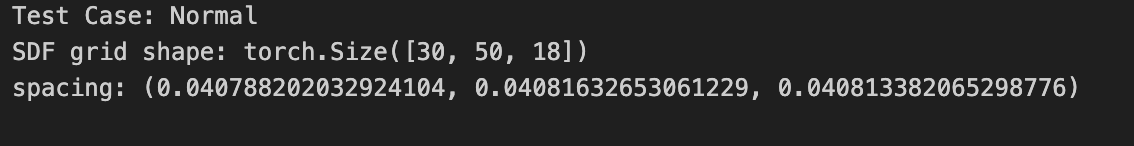

Symmetry Penalty Loss: